In [1]:
import pandas as pd
import numpy as np

# 防止部分警告
import warnings
warnings.filterwarnings("ignore")

# 数据可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

# 数据的标签处理  -- 例如将合格不合格数据转换为数值型
from sklearn.preprocessing import LabelEncoder

# 卡方检测
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [2]:
# 数据EDA包括： 【EDA:数据探索】
# 1. 数据可视化 -- 数据离散和连续性分析
# 2. 数据分布差异
# 3. 数据特征工程

# 一、数据探索

In [ ]:
train_data = pd.read_csv("data/first_round_training_data.csv")
train_data.info()

In [4]:
train_data.head(10)

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,...,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,...,0.168761,1.098755,36.955992,8.454598,11.438066,177.243120,338.729256,2.021704,0.079526,Pass
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,11.649033,0.066671,225.632949,0.481860,20597.447822,3.723330,15.376190,0.986973,4.634376,Fail
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,...,0.078213,110.079689,2.208138,0.073525,236.079314,0.064196,0.576302,33.875790,1.813727,Fail
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,0.380281,0.011491,0.654517,0.025872,176.948915,0.029777,0.246726,27.117165,0.081819,Fail
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,1.555672,38.613386,0.260989,0.009380,194.798039,0.055053,0.014725,13.569707,18.138496,Fail
5,0.004062,14.556483,0.786945,0.010545,0.000525,0.001623,2286.523413,0.035407,0.593081,1.010385,...,8.998940,6.392712,16.107479,1.016071,86.064258,0.576380,123.057489,16.133884,0.598517,Good
6,0.438449,1.232559,2.882699,0.610757,1.600654,0.464037,0.600827,17.850021,0.051850,0.010192,...,0.034557,0.000971,1.021246,1.791292,0.377312,0.035493,0.146690,41.285376,5.985572,Good
7,48159.917401,0.002987,14.863813,0.063287,1.434060,0.314162,0.600827,17.850021,0.051850,0.010192,...,0.255094,0.090395,21.035514,29.608630,0.581454,0.615609,3.321156,0.013034,0.045039,Good
8,1.456601,52.381578,20.625283,366.074831,1.434060,0.258497,0.600827,17.850021,0.051850,0.010192,...,49.151635,43.315938,0.581297,0.753916,0.610076,0.029777,0.007033,3.397996,20.322889,Pass
9,0.000109,4.784654,31.916672,20.672388,1.284806,0.175007,0.600827,17.850021,0.051850,0.010192,...,0.020348,58.681014,8.387914,33.362518,0.108174,1.356619,1.081445,0.056060,0.413597,Good


# 二、 数据离散性和连续性分析

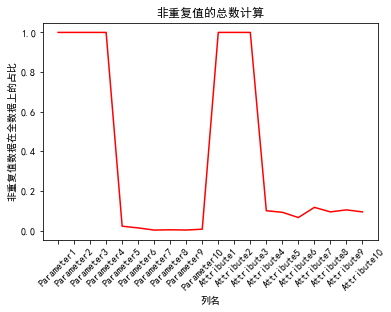

In [5]:
col_name = train_data.drop(['Quality_label'], 1).columns  # 去掉标签，因为是非数值型
Notdlts_count = []

for i in col_name:
    # 计算非重复值的个数
    Notdlts = len(train_data[i].drop_duplicates())/6000
    Notdlts_count.append(Notdlts)
    
plt.plot(col_name, Notdlts_count, c = 'r')
plt.title("非重复值的总数计算")
plt.xlabel('列名')
plt.ylabel('非重复值数据在全数据上的占比')
plt.xticks(rotation = 45) # 旋转X轴的刻度名
plt.show()

In [6]:
# 上图的结论
# P5 - P10 基本为离散型  A4 - A10 有可能是离散特征 其余均为连续型特征

In [7]:
# 提取出全部特征
unit = train_data.drop(['Quality_label'], 1)

In [8]:
unit

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,6.856075,0.168761,1.098755,36.955992,8.454598,11.438066,177.243120,338.729256,2.021704,0.079526
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,0.000362,11.649033,0.066671,225.632949,0.481860,20597.447822,3.723330,15.376190,0.986973,4.634376
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,0.022201,0.078213,110.079689,2.208138,0.073525,236.079314,0.064196,0.576302,33.875790,1.813727
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,1.459004,0.380281,0.011491,0.654517,0.025872,176.948915,0.029777,0.246726,27.117165,0.081819
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,11.576647,1.555672,38.613386,0.260989,0.009380,194.798039,0.055053,0.014725,13.569707,18.138496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,317.161934,7.690017,0.253716,1.097810,5.984919,4.818868,0.152059,0.035407,0.593081,1.948330,0.008219,0.005857,0.003829,0.027396,0.008576,6.124409,0.405692,0.290754,0.458581,0.075130
5996,7.351795,0.012633,6.496857,0.003896,5.362018,4.818868,0.152059,0.035407,0.593081,1.948330,0.023315,27610.696002,0.000805,0.253362,0.057910,10.390009,0.229278,0.267837,0.015498,0.476769
5997,0.400401,0.097580,0.005807,2.848211,3.856009,2.208755,0.152059,0.035407,0.593081,1.948330,2.236240,0.076602,12.709665,0.188337,0.040479,11.438066,1.163413,0.530878,0.197839,0.128941
5998,0.133547,0.013352,3.396037,0.351274,4.803947,5.856584,0.152059,0.035407,0.593081,1.948330,11193.620150,0.000068,11.701964,0.026596,0.011219,3.787746,0.033968,0.172866,0.011237,5.985572


# 三、 分析数据的分布差异【尤其注意上一节的偏度数据 skew】

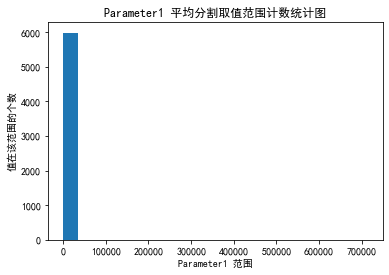

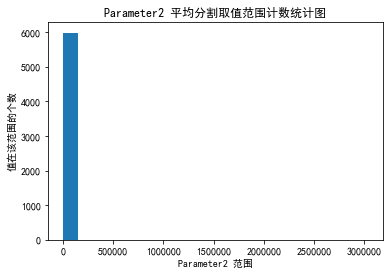

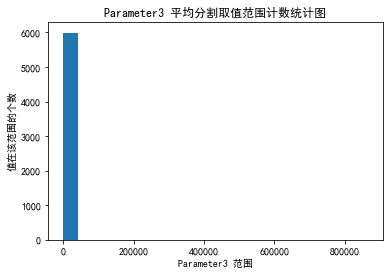

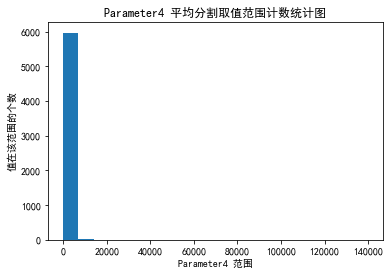

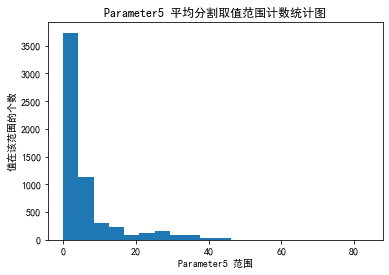

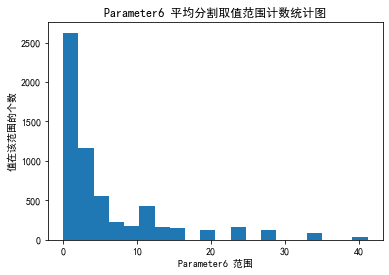

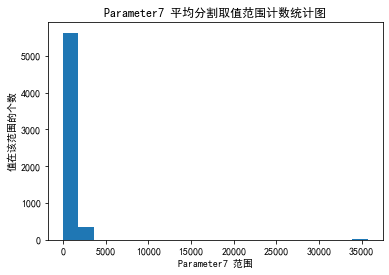

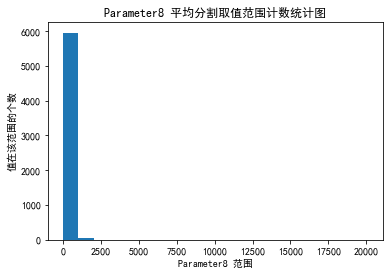

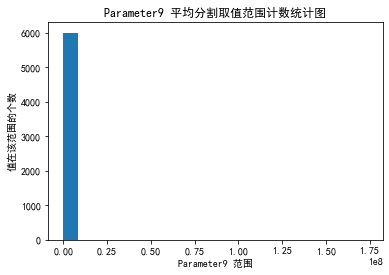

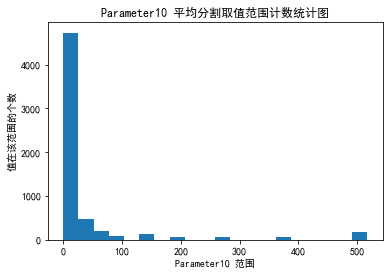

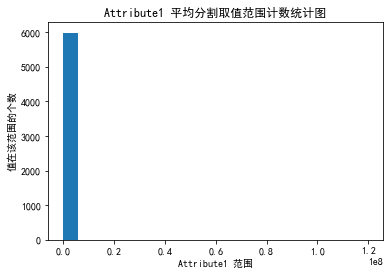

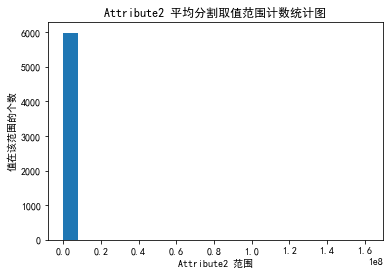

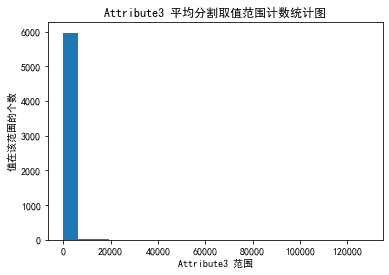

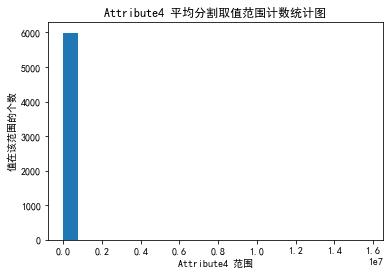

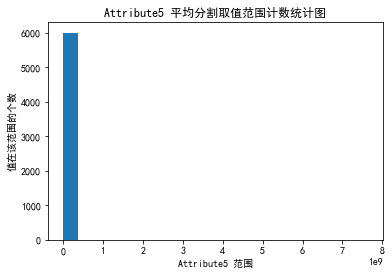

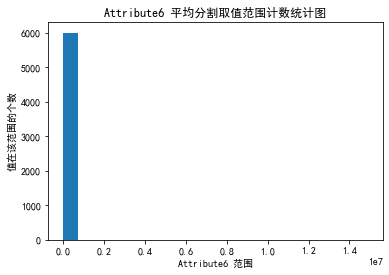

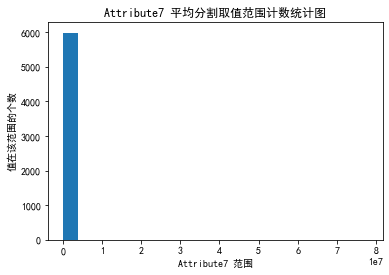

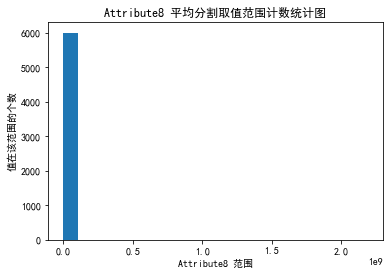

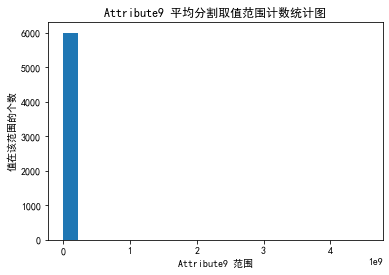

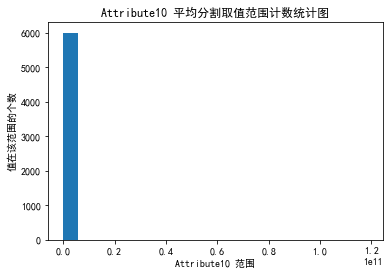

In [9]:

#  画直方图 -- 只有通过直方图才能显示数据的偏度和峰度
# 1. 遍历列名 
for i in col_name:
    plt.hist(unit[i], bins = 20)
    plt.title('%s 平均分割取值范围计数统计图' %i)
    plt.xlabel('%s 范围'%i)
    plt.ylabel('值在该范围的个数')
    plt.show()

In [10]:
# 由上图表可以看出：
# 大部分的值，全部聚集在左侧（靠近于0），分布不均匀，数据分布不均衡 -- 接下来要怎么做？ 去偏

# 四、 数据的离散程度 -- 看数据的标准差[方差开根号]

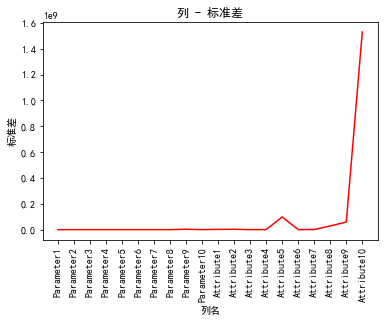

In [11]:
# 1. 获取列名
col_name = unit.columns

# 2. 计算标准差（std）
col_std = unit.describe().T['std']

plt.plot(col_name, col_std, c = 'red')
plt.title('列 - 标准差')
plt.xlabel('列名')
plt.ylabel('标准差')
plt.xticks(rotation = 90)

plt.show()

In [12]:
# 上图结论：
# 列A10的标准差太高，导致无法明显分辨其他列的标准差  -- 怎么做？ 开根号还是取对数？

# 五、 数据的标签处理

In [13]:
lb = LabelEncoder()

train_data['Quality_label'] = lb.fit_transform(train_data['Quality_label'])

In [14]:
train_data

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,...,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,...,0.168761,1.098755,36.955992,8.454598,11.438066,177.243120,338.729256,2.021704,0.079526,3
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,11.649033,0.066671,225.632949,0.481860,20597.447822,3.723330,15.376190,0.986973,4.634376,1
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,...,0.078213,110.079689,2.208138,0.073525,236.079314,0.064196,0.576302,33.875790,1.813727,1
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,0.380281,0.011491,0.654517,0.025872,176.948915,0.029777,0.246726,27.117165,0.081819,1
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,...,1.555672,38.613386,0.260989,0.009380,194.798039,0.055053,0.014725,13.569707,18.138496,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,317.161934,7.690017,0.253716,1.097810,5.984919,4.818868,0.152059,0.035407,0.593081,1.948330,...,0.005857,0.003829,0.027396,0.008576,6.124409,0.405692,0.290754,0.458581,0.075130,3
5996,7.351795,0.012633,6.496857,0.003896,5.362018,4.818868,0.152059,0.035407,0.593081,1.948330,...,27610.696002,0.000805,0.253362,0.057910,10.390009,0.229278,0.267837,0.015498,0.476769,3
5997,0.400401,0.097580,0.005807,2.848211,3.856009,2.208755,0.152059,0.035407,0.593081,1.948330,...,0.076602,12.709665,0.188337,0.040479,11.438066,1.163413,0.530878,0.197839,0.128941,3
5998,0.133547,0.013352,3.396037,0.351274,4.803947,5.856584,0.152059,0.035407,0.593081,1.948330,...,0.000068,11.701964,0.026596,0.011219,3.787746,0.033968,0.172866,0.011237,5.985572,3


In [15]:
# 以上是拿到数据的常规操作，也是必须要进行的操作 -- 都是要和背景相关的东西与知识相结合起来做

# 六、特征工程 -- 为了解决：数据探索性分析所出现的问题  -- 结合背景来做，知识点也就那么一点

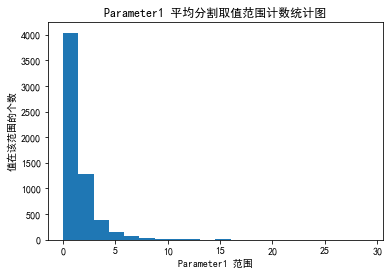

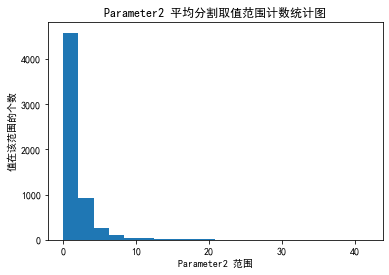

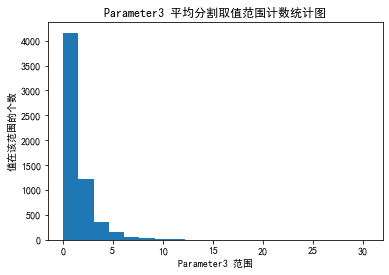

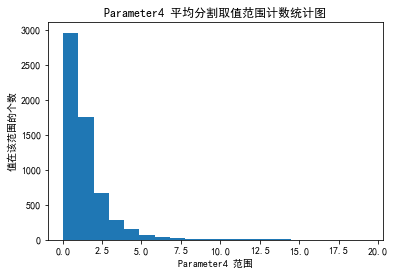

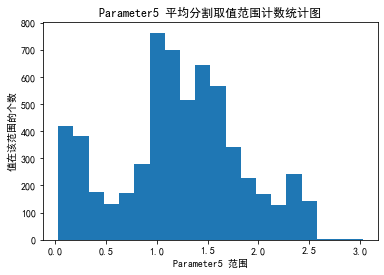

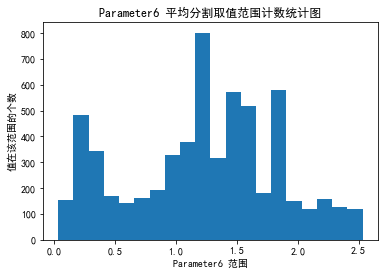

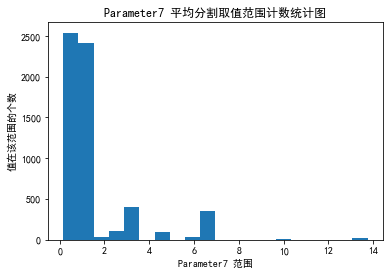

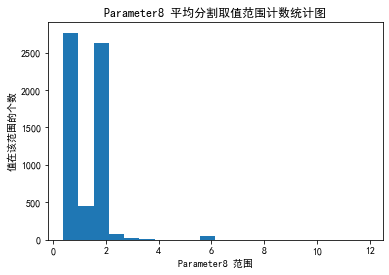

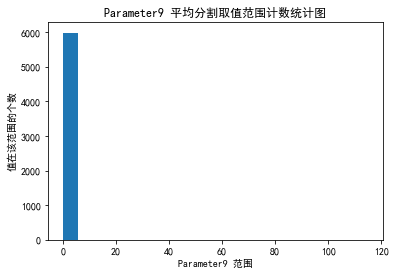

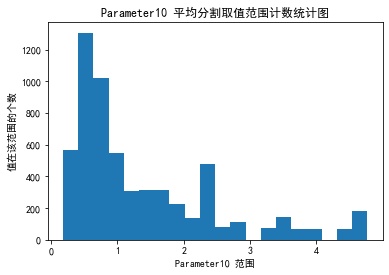

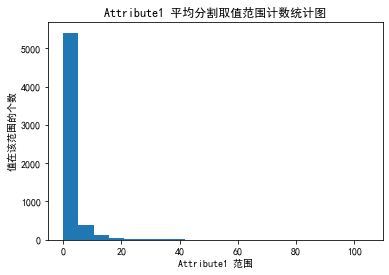

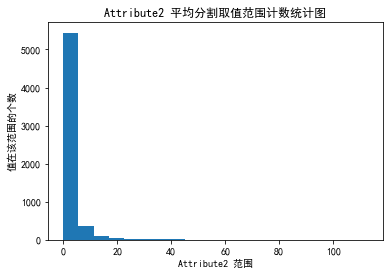

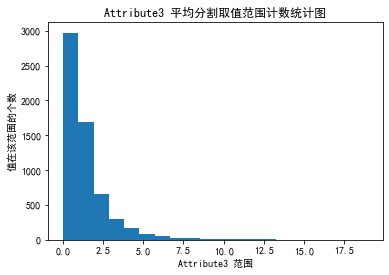

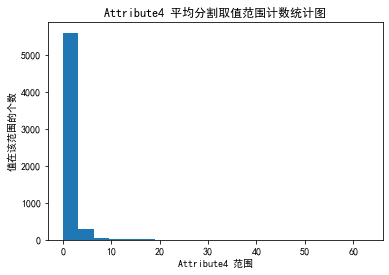

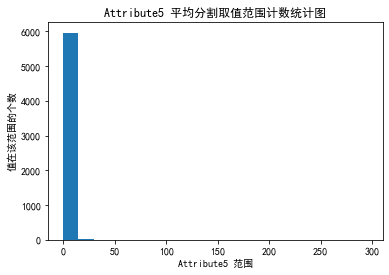

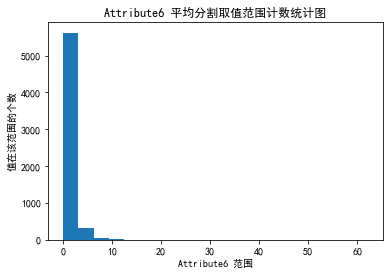

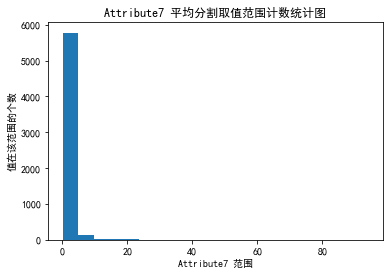

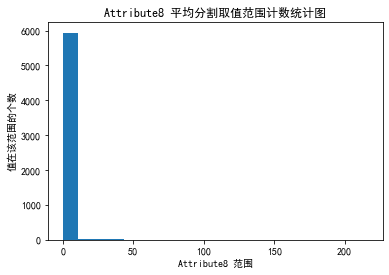

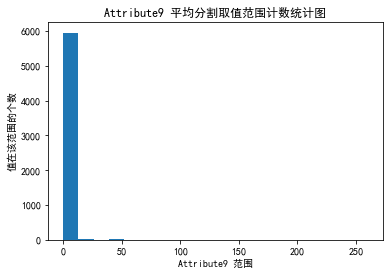

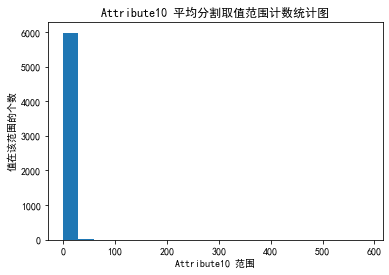

In [17]:
# 1. 解决去偏
# 解决方法；通过开N方（取2，3，4 都可以，不建议过大，这里以4为例）的方式，将0-1的值增大，并缩小大于1 的值
unit[col_name] = unit[col_name] ** (1/4)

# 遍历列名 
for i in col_name:
    plt.hist(unit[i], bins = 20)
    plt.title('%s 平均分割取值范围计数统计图' %i)
    plt.xlabel('%s 范围'%i)#
    plt.ylabel('值在该范围的个数')
    plt.show()

In [18]:
 # P5 - P10 是离散值  不太符合正态分布，怎么处理？

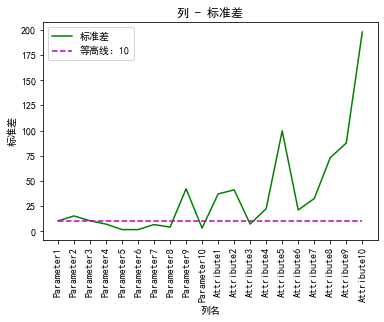

In [19]:
# 2. 去除数据的标准差
# 解决办法： 见 标准差 进行开N次方，再观察图像

# 此处开4 次方（一般在2 - 10之间）

plt.plot(col_name, col_std ** (1/4), c = 'g')
plt.plot(col_name, 10 * np.ones((1, 20))[0], c = 'm', linestyle = '--')
plt.title('列 - 标准差')
plt.xlabel('列名')
plt.ylabel('标准差')
plt.xticks(rotation = 90)
plt.legend(['标准差', '等高线：10'])

plt.show()

In [20]:
# 通过观察可以看出，绝大多数列的标准差已经突破1e4(1000)
# 解决方法： 因为全部特征的特征值范围都要>0, 所以可以通过log变换，但是为了不影响接近于0的小数，
# 故因为当x--> 0时，有ln(x + 1) --> x ,所以：

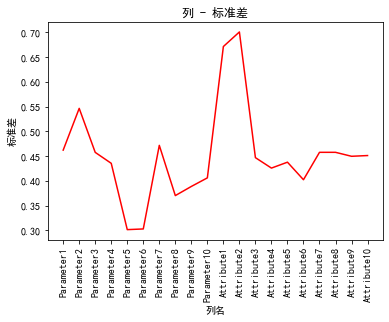

In [21]:
# np.log() -- 取对数比较好
unit[col_name] = np.log(unit[col_name] + 1) # +1 和函数图像有关系 ln[0 -1]是负数

col_std = unit.describe().T['std']

plt.plot(col_name, col_std, c = 'red')
plt.title('列 - 标准差')
plt.xlabel('列名')
plt.ylabel('标准差')
plt.xticks(rotation = 90)

plt.show()

In [22]:
# 从图中可以明显看出：数据的标准差已经稳定在[1, 3]这个范围内了，说明log变换很成功

In [23]:
# 3. 特征归一化
# 归一化可以使用sklearn 中的normalize
for i in unit.columns:
    unit[i] = (unit[i] - unit[i].min()) / (unit[i].max() - unit[i].min())

In [24]:
# 4. 特征选择
# 设置卡方检验，选择k=2个最佳特征
test = SelectKBest(score_func=chi2, k = 14) # k = 14表示我要选择14个特征
# 进行校验
fit = test.fit(unit, train_data['Quality_label'])
# 打印卡方检验值
print(fit.scores_)

[6.94321767e-02 1.50794325e-01 1.51762585e-01 3.27083661e-02
 3.68690339e+01 4.69610147e+01 1.76383142e+01 3.34681908e+01
 1.38721648e+01 1.26626342e+01 5.92267160e-01 2.09653354e-01
 7.63703542e-01 2.05053924e+02 8.59553654e+01 7.43780837e+01
 1.10317436e+02 8.67764072e+01 4.66649521e+01 1.95335122e+01]


In [25]:
train = pd.DataFrame(fit.transform(unit), columns=['V{0}'.format(i) for i in range(1, 15)])

In [26]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.075492,0.093479,0.755453,0.013167,0.107789,0.333697,0.227337,0.291276,0.169705,0.236556,0.302333,0.281466,0.109177,0.037941
1,0.094759,0.137185,0.755453,0.013167,0.107789,0.333697,0.127988,0.374261,0.100918,0.610695,0.148384,0.170487,0.091749,0.115087
2,0.094759,0.130152,0.755453,0.013167,0.107789,0.333697,0.477090,0.182903,0.067888,0.371893,0.041258,0.080485,0.191653,0.093623
3,0.094759,0.137185,0.755453,0.013167,0.107789,0.333697,0.084870,0.145105,0.053400,0.357863,0.027316,0.062462,0.184382,0.038340
4,0.094759,0.137185,0.755453,0.013167,0.107789,0.333697,0.411674,0.120237,0.041684,0.362516,0.038321,0.017100,0.162553,0.150097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.668853,0.713063,0.133026,0.013167,0.107789,0.387573,0.064238,0.072125,0.040753,0.212350,0.082659,0.065784,0.074772,0.037147
5996,0.656607,0.713063,0.133026,0.013167,0.107789,0.387573,0.041780,0.119487,0.064346,0.232741,0.068593,0.064113,0.019178,0.066864
5997,0.620668,0.622248,0.133026,0.013167,0.107789,0.387573,0.347464,0.112168,0.059292,0.236556,0.111689,0.078647,0.058097,0.044987
5998,0.644494,0.736938,0.133026,0.013167,0.107789,0.387573,0.342920,0.071605,0.043594,0.194698,0.029577,0.055536,0.015386,0.121317


In [27]:
# 算法选型
# sklearn 官方网址
#https://scikit-learn.org/stable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_data['Quality_label']) # train就是上面最后的特征

# 第一个算法： SVM支持向量机

In [33]:
#： 第一个算法： SVM支持向量机
from sklearn.svm import SVC # 导入算法
from sklearn.model_selection import GridSearchCV # 算法调参工具 -- 网格搜索交叉验证

In [29]:
model = SVC()
model.fit(X_train, y_train)
# 模型的训练，模型里面有很多的参数！！！？？是不是最佳的参数呢？ == Bushi 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
model.score(X_test, y_test)

0.6186666666666667

# 第二个算法 -- 集成算法（ensemble）【GBDT, RF, Boosting】

In [43]:
from sklearn.ensemble import GradientBoostingClassifier # 导入梯度提升分类器
# 其他集成算法
from sklearn.ensemble import R

In [44]:
model1 = GradientBoostingClassifier() # 实例化算法

In [45]:
model2 = GridSearchCV(model1, param_grid={'learning_rate':[0.1,0.01,0.001], "n_estimators":[10, 100, 1000]}, verbose = 1)

In [46]:
model2.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [50]:
model2.score(X_test, y_test)# 准确率

0.996

In [54]:
model2 = GridSearchCV(model1, param_grid={'learning_rate':[0.1,0.01,0.001], "n_estimators":[10, 100, 1000]}, verbose = 2)
# verbose 参数写为2，结果显示的比较详细。0.或者1 显示的就不详细

In [55]:
model2.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.2s
[CV] learning_rate=0.1, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.2s
[CV] learning_rate=0.1, n_estimators=10 ..............................
[CV] ............... learning_rate=0.1, n_estimators=10, total=   0.2s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   1.3s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   1.3s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   1.3s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=   7.0s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=   7.0s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [57]:
# 找打最好的参数
model2.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [58]:
model2.score(X_test, y_test)# 准确率

0.996

In [59]:
model1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# 注意学习sklearn 官网内容，各个模块讲的非常好

# 第三个算法 -- lightgbm - 梯度集成算法，属于集成的一系列算法

In [ ]:
# 这个算法不是sklearn中的， 需要安装pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier # 这个既可以做分类页可以做回归，这里做分类

In [ ]:
model3 = LGBMClassifier(verbose = 2)

In [ ]:
model3.fit(X_train, y_train, eval_set = [(X_test, y_test)]) # 算法训练（加上交叉验证）

In [ ]:
model3.score(X_test, y_test) # 模型评分

In [ ]:
# 评估结果
history_1 = model3.evals_result_
history_1

# 第四个算法 -- catboost -- 基于集成的算法

In [ ]:
# 对数据处理的比较好，不一定必须是数值型，可以是字符串型等
# 趋势是往深度学习方向走
# 需要安装 pip install catboost

In [ ]:
from catboost import CatBoostClassifier # 导入算法

In [ ]:
model4 = CatBoostClassifier()

In [ ]:
model4.fit(X_train, y_train, eval_set = [(X_test, y_test)])# 模型的训练（加上交叉验证）

In [ ]:
model4.score(X_test, y_test)

In [ ]:
# 评估结果
history_2 = model4.evals_result_
history_2

# 比较二者的损失

In [ ]:
a = history_1['valid_0']['multi_logloss']
b = history_2['learn']['Logloss']

plt.plot(np.arange(len(a)), a)
plt.plot(np.arange(len(b)), b)
plt.title('lgb-cat,loss损失图像')
plt.xlabel('迭代次数')
plt.ylabel('损失值')
plt.legend(['LGB','GAT'])
plt.show()

# 模型准确率对比

In [ ]:
%%time

a = []
b = []

# 定义模型
for i in range(10):
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(train, train_data['Quality_label'])
    
    lgb_model = LGBMClassifier()
    cbt_model = CatBoostClassifier(verbose = 200)
    
    # 训练模型
    lgb_model.fit(X_train, y_train)
    cbt_model.fit(X_train, y_train)
    
    # 模型评估
    a.append(lgb_model.score(X_test, y_test))
    b.append(cbt_model.score(X_test, y_test))
    
print('训练完成')

# 模型准确率对比图

In [ ]:
x = np.arange(10)

plt.plot(x, a)
plt.plot(x, b)

plt.title('模型准确率对比')
plt.xlabel('次数')
plt.ylabel('准确率')
plt.legend('LBG', 'Cat')

plt.show()

In [ ]:
# 模型评估标准: 准确率是否高、运行是否快，等几个方面